In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [8]:
df=pd.read_csv(r"D:\Download\spam.csv",encoding='latin-1')[['v1', 'v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.shape

(5572, 2)

# 1.Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [17]:
df["Target"]=encoder.fit_transform(df["Target"])
df["Target"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5572, dtype: int64

In [18]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [21]:
# Check for duplicate value
df.duplicated().sum()

np.int64(403)

In [23]:
#drop duplicate
df=df.drop_duplicates(keep="first")

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.shape

(5169, 2)

# 2.EDA

In [26]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

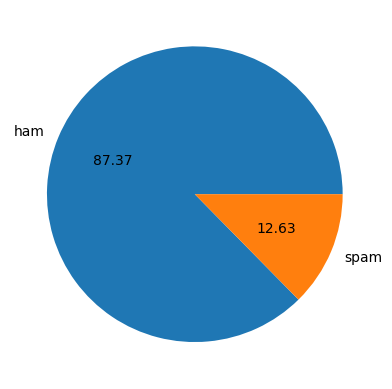

In [32]:
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [33]:
import nltk

In [34]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KAILASH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
df["char_len"]=df["Text"].apply(len)

In [36]:
df.head()

,Target,Text,char_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
df["num_word"]=df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [39]:
df.head()

,Target,Text,char_len,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [40]:
df["num_sentence"]=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df.head()

,Target,Text,char_len,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df[["char_len","num_word","num_sentence"]].describe()

,char_len,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
#HAM 
df[df["Target"]==0][["char_len","num_word","num_sentence"]].describe()

,char_len,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
#SPAM
df[df["Target"]==1][["char_len","num_word","num_sentence"]].describe()

,char_len,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


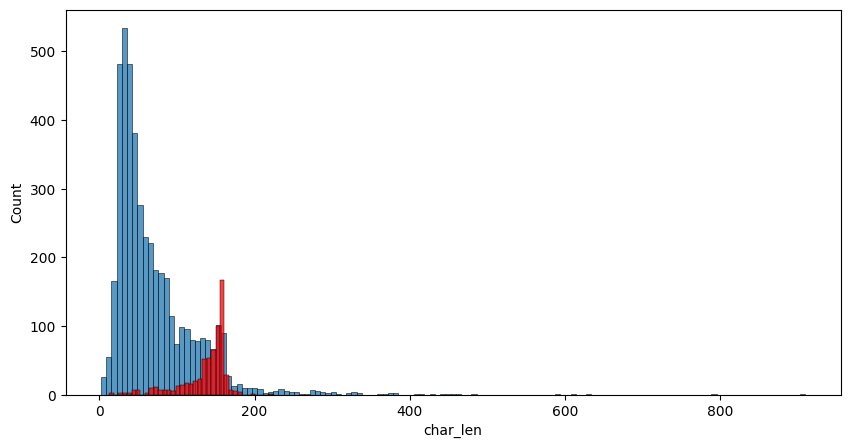

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Target"]==0]["char_len"])
sns.histplot(df[df["Target"]==1]["char_len"],color="red")
plt.show()

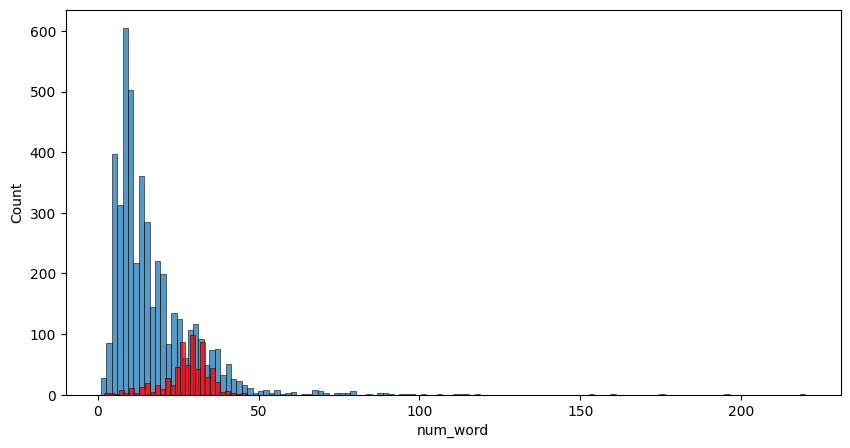

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Target"]==0]["num_word"])
sns.histplot(df[df["Target"]==1]["num_word"],color="red")
plt.show()

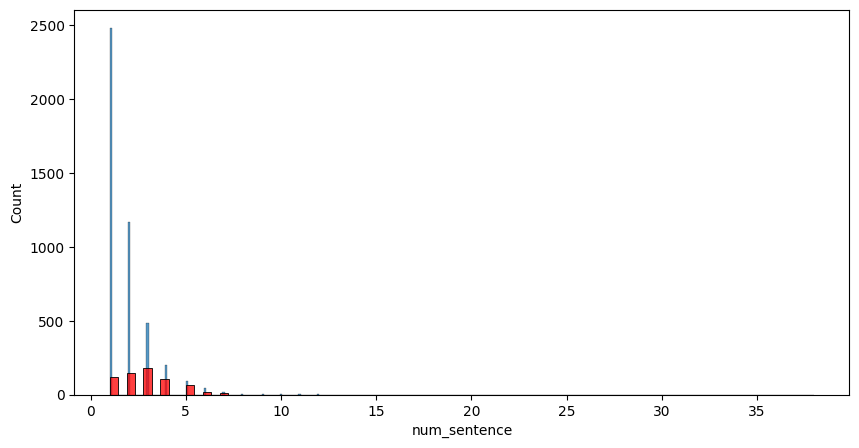

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Target"]==0]["num_sentence"])
sns.histplot(df[df["Target"]==1]["num_sentence"],color="red")
plt.show()

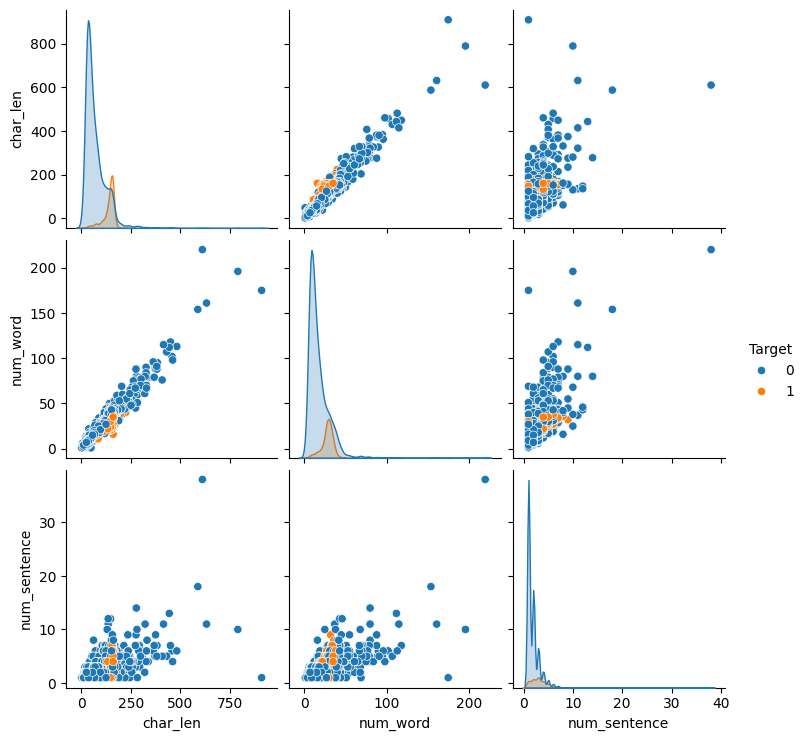

In [51]:
sns.pairplot(df,hue="Target")
plt.show()

# 3.Text Preprocessing
#  .Lower case
# .Tokenization
# .Removing special characters
# .Removing stopwords and punctuation
# .stemming

In [70]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [71]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [83]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
ps.stem("going")

'go'

In [84]:
 def transform_text(text):
     text=text.lower()
     text=nltk.word_tokenize(text)

     y=[]
     for i in text:
         if i.isalnum():
             y.append(i)
     text= y[:] 
     y.clear()

     for i in text:
         if i not in stopwords.words("english") and i not in string.punctuation:
             y.append(i)
     text=y[:]
     y.clear()

     for i in text:
         y.append(ps.stem(i))
            
     return " ".join(y)

In [87]:
transform_text(df["Text"][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [91]:
df["tranform_text"]=df["Text"].apply(transform_text)
df["tranform_text"]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: tranform_text, Length: 5169, dtype: object

In [92]:
df.head()

,Target,Text,char_len,num_word,num_sentence,tranform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [108]:
from wordcloud import WordCloud

wc = WordCloud(
    width=800, 
    height=800, 
    min_font_size=10, 
    background_color="white"
)

In [109]:
spam_wc=wc.generate(df[df["Target"]==1]["tranform_text"].str.cat(sep=" "))

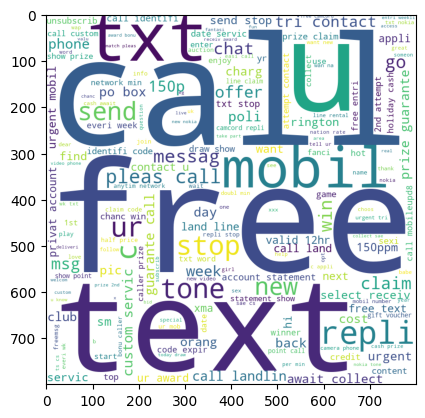

In [110]:
plt.imshow(spam_wc)

In [111]:
ham_wc=wc.generate(df[df["Target"]==0]["tranform_text"].str.cat(sep=" "))

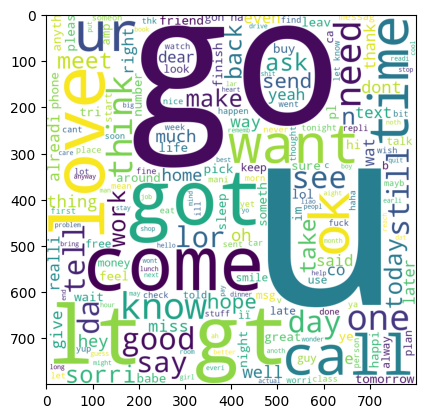

In [112]:
plt.imshow(ham_wc)

# most common spam words

In [113]:
spam_corpus=[]
for msg in df[df["Target"]==1]["tranform_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [114]:
len(spam_corpus)

9939

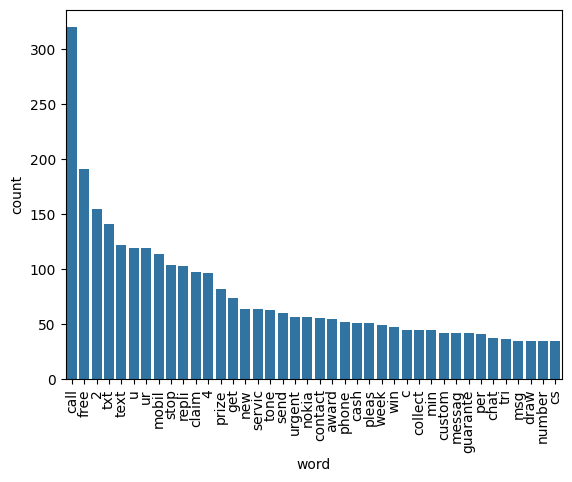

In [120]:
from collections import Counter
most_common_words=Counter(spam_corpus).most_common(40)
df_common=pd.DataFrame(most_common_words,columns=["word","count"])
sns.barplot(x="word",y="count",data=df_common)
plt.xticks(rotation=90)
plt.show()

# most common ham words

In [131]:
ham_corpus=[]
for msg in df[df["Target"]==0]["tranform_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [129]:
len(ham_corpus)

35404

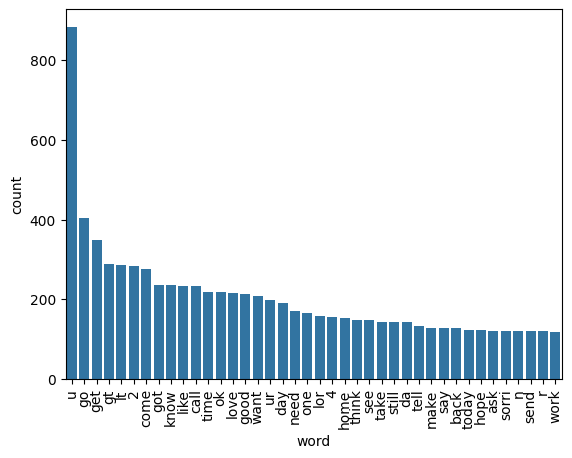

In [123]:
from collections import Counter
most_common_words=Counter(ham_corpus).most_common(40)
df_common=pd.DataFrame(most_common_words,columns=["word","count"])
sns.barplot(x="word",y="count",data=df_common)
plt.xticks(rotation=90)
plt.show()

In [124]:
df.head()

,Target,Text,char_len,num_word,num_sentence,tranform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4.Model Building 

In [154]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [155]:
x=tfidf.fit_transform(df["tranform_text"]).toarray()

In [156]:
x.shape

(5169, 6708)

In [157]:
y=df["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [160]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [161]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [162]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [163]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8713733075435203
[[774 111]
 [ 22 127]]
0.5336134453781513


In [164]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9458413926499033
[[885   0]
 [ 56  93]]
1.0


In [165]:
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9661508704061895
[[881   4]
 [ 31 118]]
0.9672131147540983
